___

<a href='https://mainacademy.ua/'> <img src='https://mainacademy.ua/wp-content/uploads/2019/03/logo-main.png' alt = 'Хмм, щось з інтернетом'/></a>
___

# Module 8: Unsupervised learning

## Lab work 8



#### Мета: 

* навчитися використовувати моделі без учителем

### Завдання 1:

Опрацюйте файл `Groceries.csv`. Використовуючи алгоритм асоціативних зв'язків, знайдіть:
- зробіть описову статистику даного файлу
- ведіть топ-3 продукти, що продаються
- виведіть топ-2 пари продуктів, що продаються
- придумайте, як отриману інформацію можна використатти (опишіть в 3-4 реченнях)

In [64]:
!pip install apyori

  Created wheel for apyori: filename=apyori-1.1.2-py3-none-any.whl size=5979 sha256=a5b396b0339d050c7862bf92b1c3a97f9c18ecfd7e2960dd467544be0a7afa75
  Stored in directory: c:\users\alyona\appdata\local\pip\cache\wheels\1b\02\6c\a45230be8603bd95c0a51cd2b289aefdd860c1a100eab73661
Successfully built apyori


In [234]:
import pandas as pd
import numpy as np
from apyori import apriori
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [235]:
df = pd.read_csv('Groceries.csv', header=None)
df.head()

,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,31
0,citrus fruit,semi-finished bread,margarine,ready soups,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,tropical fruit,yogurt,coffee,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,whole milk,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,pip fruit,yogurt,cream cheese,meat spreads,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,other vegetables,whole milk,condensed milk,long life bakery product,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [122]:
df.shape

(9835, 32)

In [123]:
df.sample(10)

,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,31
5646,citrus fruit,other vegetables,yogurt,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1667,beef,citrus fruit,pip fruit,yogurt,rolls/buns,flour,margarine,soups,bottled water,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3605,frozen vegetables,margarine,cleaner,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4344,pork,beef,hamburger meat,other vegetables,whole milk,rolls/buns,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7173,tropical fruit,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4640,pip fruit,rolls/buns,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6187,citrus fruit,butter,yogurt,cat food,coffee,bottled water,chocolate,specialty chocolate,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7797,whole milk,yogurt,domestic eggs,baking powder,newspapers,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4445,pip fruit,other vegetables,yogurt,whipped/sour cream,domestic eggs,brown bread,specialty vegetables,coffee,specialty chocolate,pot plants,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1739,whole milk,white bread,salty snack,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [81]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9835 entries, 0 to 9834
Data columns (total 32 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       9835 non-null   object
 1   1       7676 non-null   object
 2   2       6033 non-null   object
 3   3       4734 non-null   object
 4   4       3729 non-null   object
 5   5       2874 non-null   object
 6   6       2229 non-null   object
 7   7       1684 non-null   object
 8   8       1246 non-null   object
 9   9       896 non-null    object
 10  10      650 non-null    object
 11  11      468 non-null    object
 12  12      351 non-null    object
 13  13      273 non-null    object
 14  14      196 non-null    object
 15  15      141 non-null    object
 16  16      95 non-null     object
 17  17      66 non-null     object
 18  18      52 non-null     object
 19  19      38 non-null     object
 20  20      29 non-null     object
 21  21      18 non-null     object
 22  22      14 non-null     

In [127]:
df.describe()

,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,31
count,9835,7676,6033,4734,3729,2874,2229,1684,1246,896,...,14,8,7,7,6,5,4,1,1,1
unique,158,151,155,153,150,137,138,140,128,120,...,13,7,6,7,5,4,3,1,1,1
top,sausage,whole milk,whole milk,whole milk,rolls/buns,soda,soda,shopping bags,soda,shopping bags,...,waffles,bottled beer,chocolate,rum,hygiene articles,napkins,house keeping products,skin care,hygiene articles,candles
freq,825,654,506,315,176,150,120,76,61,49,...,2,2,2,1,2,2,2,1,1,1


In [236]:
records = []
for i in range(0, 9835):
    records.append([str(df.values[i,j]) for j in range(0, 32) if pd.notna(df.values[i,j])])

### Виведіть топ-3 продукти, що продаються

In [250]:
from collections import Counter

countr = Counter()
new_list = []

for small_list in records:
    for i in small_list:
        new_list.append(i)
        countr[i] += 1
    
countr.most_common(3)

[('whole milk', 2513), ('other vegetables', 1903), ('rolls/buns', 1809)]

### Виведіть топ-2 пари продуктів, що продаються разом

In [288]:
association_rules = apriori(records, min_support=0.0045, min_confidence=0.2, min_lift=3, min_length=2)

In [289]:
for item in association_rules:
    pair = item[0] 
    items = [x for x in pair]
    print("Rule: " + items[0] + " -> " + items[1] )

    print("Support: " + str(item[1]))

    print("Confidence: " + str(item[2][0][2]))
    print("Lift: " + str(item[2][0][3]))
    print("=====================================")

Rule: whipped/sour cream -> baking powder
Support: 0.004575495678698526
Confidence: 0.25862068965517243
Lift: 3.607850330154072
Rule: root vegetables -> beef
Support: 0.017386883579054397
Confidence: 0.3313953488372093
Lift: 3.0403668431100312
Rule: whipped/sour cream -> berries
Support: 0.009049313675648195
Confidence: 0.27217125382262997
Lift: 3.796885505454703
Rule: liquor -> bottled beer
Support: 0.004677173360447382
Confidence: 0.4220183486238532
Lift: 5.240594013529793
Rule: red/blush wine -> bottled beer
Support: 0.004880528723945094
Confidence: 0.253968253968254
Lift: 3.1537598204264876
Rule: flour -> sugar
Support: 0.00498220640569395
Confidence: 0.28654970760233917
Lift: 8.46311223504206
Rule: root vegetables -> herbs
Support: 0.007015760040671073
Confidence: 0.43124999999999997
Lift: 3.956477378731343
Rule: sliced cheese -> sausage
Support: 0.007015760040671073
Confidence: 0.2863070539419087
Lift: 3.047434930215013
Rule: root vegetables -> other vegetables
Support: 0.0079308

In [299]:
# Зводимо дані у таблицю, знаходимо топ-2 пари продуктів, що найчастіше продаються разом

In [304]:
association_rules = apriori(records, min_support=0.0045, min_confidence=0.2, min_lift=3, min_length=2)

products = {}
i = 0
for item in association_rules:
    pair = item[0] 
    items = [x for x in pair]
    products[i] = [items[0] + " -> " + items[1], item[1], item[2][0][2], item[2][0][3]]
    i += 1
data = pd.DataFrame(products, index = ['Pair', 'Support', 'Confidence', 'Lift']).T
data.sort_values('Support', ascending=False, inplace=True)
data.head(2)

,Pair,Support,Confidence,Lift
1,root vegetables -> beef,0.0173869,0.331395,3.04037
37,root vegetables -> tropical fruit,0.012303,0.342776,3.14478


### Висновки:
- Топ-3 продукти, які продаються - це молоко, овочі та випічка (булочки). Таким чином магазин повинен мати достатні запаси цих продуктів кожен день, а також подумати над розширенням лінійки данної продукції, спробувати запропонувати своєму клієнту щось нове, наприклад у випічці (нові булочки, печиво, випічка із муки різних сортів і т.п.).
- Топ-2 пари продуктів, що найчастіше продаються разом - це овочі-коренеплоди + яловичина та овочі-коренеплоди + тропічні фрукти. Обидві пари дуже логічні з точки зору споживача, адже ми завжди беремо мясо та овочі на гарнір, наприклад картоплю, а також, зайшовши до овочево-фруктового відділу ми завжди беремо овочі та фрукти. Якщо у другому випадку не потрібно нічого змінювати - ці товари вже і так представлені в одному відділі, то на рахунок мяса та овочей - ці відділи потрібно розташувати якомога ближче один від одного для зручності покупок.

### Завдання 2:

Завантажте файл https://www.kaggle.com/vjchoudhary7/customer-segmentation-tutorial-in-python
 
- Спробуйте провести кластеризацію, тобто виділити цільові групи, для яких можна впроваджувати певні маркетингові акції
- Опишіть отримані результати

In [16]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [86]:
df = pd.read_csv('Mall_Customers.csv',index_col=0)
df.shape

(200, 4)

In [89]:
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster
CustomerID,,,,,
1,Male,19,15,39,0
2,Male,21,15,81,0
3,Female,20,16,6,1
4,Female,23,16,77,1
5,Female,31,17,40,1


C:\Users\Alyona\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


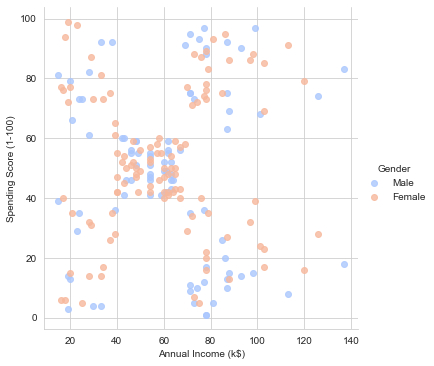

In [95]:
sns.lmplot('Annual Income (k$)', 'Spending Score (1-100)',data=df, hue='Gender',
           palette='coolwarm',fit_reg=False)

In [40]:
# Бачимо чітке розподілення людей на групи, в залежності від їх щорічного доходу та рівня витрат. Таких груп 5. 
# А ось гендер ніяк не впливає на розподілення груп (в кожній групі приблизно однакова кількість жінок та чоловіків).

In [96]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=5)

In [97]:
kmeans.fit(df.drop('Gender',axis=1))

KMeans(n_clusters=5)

In [98]:
kmeans.cluster_centers_

array([[32.69230769, 86.53846154, 82.12820513,  0.53846154],
       [45.2173913 , 26.30434783, 20.91304348,  0.60869565],
       [43.08860759, 55.29113924, 49.56962025,  0.58227848],
       [40.66666667, 87.75      , 17.58333333,  0.47222222],
       [25.52173913, 26.30434783, 78.56521739,  0.60869565]])

In [99]:
kmeans.inertia_

75399.61541401486

In [100]:
kmeans.labels_

array([1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4,
       1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4,
       1, 4, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 3, 0, 2, 0, 3, 0, 3, 0,
       3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 2, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0,
       3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0,
       3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0,
       3, 0])

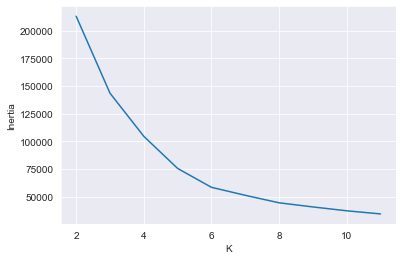

In [102]:
inertias = []
sizes = range(2, 12)
for k in sizes:
    k2 = KMeans(random_state=42, n_clusters=k)
    k2.fit(df.drop('Gender',axis=1))
    inertias.append(k2.inertia_)

fig, ax= plt.subplots(figsize=(6, 4))
pd.Series(inertias, index=sizes).plot(ax=ax)
ax.set_xlabel("K")
ax.set_ylabel("Inertia")
sns.set_style('darkgrid')

In [106]:
def converter(cluster):
    if cluster=='Female':
        return 1
    else:
        return 0
df['Cluster'] = df['Gender'].apply(converter)

In [107]:
from sklearn.metrics import confusion_matrix,classification_report
print(confusion_matrix(df['Cluster'],kmeans.labels_))
print(classification_report(df['Cluster'],kmeans.labels_))

[[18  9 33 19  9]
 [21 14 46 17 14]
 [ 0  0  0  0  0]
 [ 0  0  0  0  0]
 [ 0  0  0  0  0]]
              precision    recall  f1-score   support

           0       0.46      0.20      0.28        88
           1       0.61      0.12      0.21       112
           2       0.00      0.00      0.00         0
           3       0.00      0.00      0.00         0
           4       0.00      0.00      0.00         0

    accuracy                           0.16       200
   macro avg       0.21      0.07      0.10       200
weighted avg       0.54      0.16      0.24       200



Text(0, 0.5, 'Spending Score')

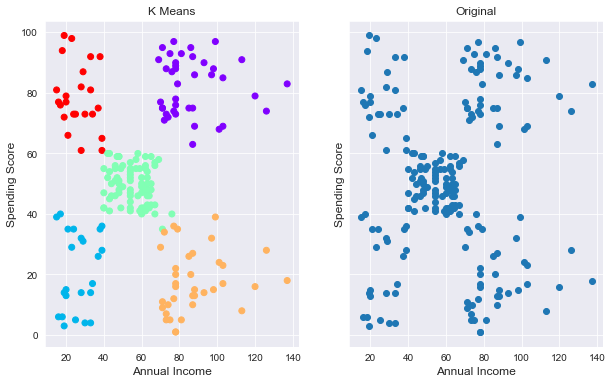

In [113]:
f, (ax1, ax2) = plt.subplots(1, 2, sharey=True,figsize=(10,6))
ax1.set_title('K Means')
ax1.scatter(df['Annual Income (k$)'], df['Spending Score (1-100)'],c=kmeans.labels_,cmap='rainbow')
ax1.set_xlabel('Annual Income', size=12)
ax1.set_ylabel('Spending Score', size=12)
ax2.set_title("Original")
ax2.scatter(df['Annual Income (k$)'], df['Spending Score (1-100)'], cmap='rainbow')
ax2.set_xlabel('Annual Income', size=12)
ax2.set_ylabel('Spending Score', size=12)

### Висновки: 
#### наша модель K-Means розподілення на кластери чітко виділила 5 кластерів, а саме:
- червоний кластер - люди з низькими доходами та низькими витратами (дохід=витрати);
- блакитний кластер - люди з високими доходами, але низькими витратами (купують лише необхідне, не витрачаються на непотрібні дрибниці);
- зелений кластер (золота середина) - люди з середніми доходами та середніми витратами (дохід=витрати);
- фіолетовий кластер - люди з низькими доходами, але високими витратами ("клієнти" покупок у розстрочку чи оплату частинами :)
- оранжевий кластер - люди з високими доходами та високими витратами (дохід=витрати).
